In [1]:
from typing import Set


from solver import BTSPSolverSAT
from util import random_points, draw_edges, export_instance, import_instance, suppress_stdout

In [2]:
%load_ext autoreload
%autoreload 2

The bottleneck 4476.526890347024 is infeasible!
New best bottleneck: 5418.460759293178!
New best bottleneck: 5043.304174844107!
New best bottleneck: 4725.22391003855!
The bottleneck 4567.184690813368 is infeasible!
New best bottleneck: 4611.5599313030725!
New best bottleneck: 4569.957220806339!
Time taken: 0.07101670900000023


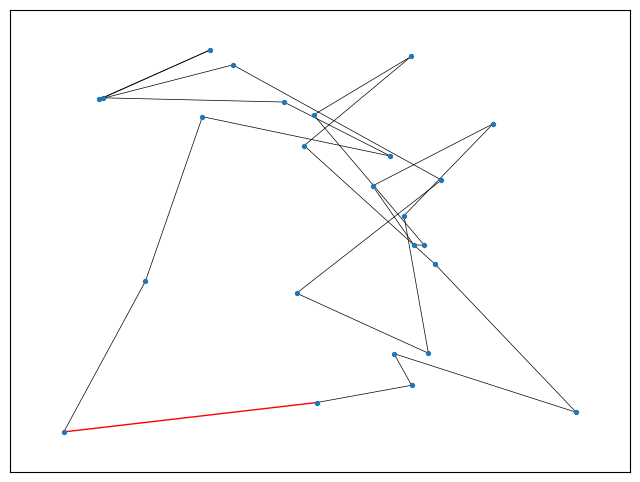

In [8]:
points = import_instance("25.json")
solver = BTSPSolverSAT(points, 2)
edges, time_taken = solver.solve(0)
print("Time taken: " + str(time_taken))
draw_edges(edges)

In [6]:
for i in range(16,101):
    export_instance(str(i)+".json",random_points(i))

# Benchmarks

In [ ]:
def benchmark(points):
    solver = BTSPSolverSAT(points, 2)
    with suppress_stdout():
        edges, time_taken = solver.solve(0)
    print("Method: Binary Search; Time taken: " + str(time_taken))

    with suppress_stdout():
        edges, time_taken = solver.solve(1)
    print("Method: Linear Search Descending; Time taken: " + str(time_taken))

    with suppress_stdout():
        edges, time_taken = solver.solve(2)
    print("Method: Linear Search Ascending; Time taken: " + str(time_taken))

In [ ]:
benchmark(import_instance("14.json"))

In [ ]:
import signal
import time

def timeout(signum, frame):
    print('Signal handler called with signal',
          signum)
    raise OSError("timeout exceeded!")

def benchmark_time():
    signal.signal(signal.SIGALRM, timeout)

    signal.alarm(60)
    start = time.time()
    num_points = 1
    try:
        while True:
            print(f'Points: {num_points}')
            solver = BTSPSolverSAT(random_points(i), 2)
            # Use binary search as it is most performant
            solver.solve(0)
            num_points += 1
    except OSError as e:
        print(e)
    signal.alarm(0)
    print(f'Biggest instance to solve in under 60 sec: {num_points - 1}')
    print(f'Failed at {num_points} points')

benchmark_time()